In [1]:
import pandas as pd
import tweepy
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

In [2]:
consumer_key = "9D1jnXCwyEcSKe6Swq8SgcJOW"
consumer_secret = "hsj0FEDfXdqInTqmq72k2rbuMlX4fw2AK5VyLaiF264eOYERUE"
access_key = "1205500986539642880-iimrrikNjvIgYL9F9VHru6kp59Z7IG"
access_secret = "gDUmpA6fPrzBsMaOtZ9gWWblIDaKeQLnFFLWuBwuITuXT"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [96]:
df1 = pd.DataFrame(columns=['username','description','location','favorite_count','totaltweets','retweetcount','text','hashtags','created_at'])

words = "#TheBatman -filter:retweets"
date_since = "2022-03-04"
numtweet = 2000
tweets = tweepy.Cursor(api.search,words,lang='en',since_id=date_since).items(numtweet)


list_tweets = [tweet for tweet in tweets]
i = 1
#collecting most recent 2000 tweets
for tweet in list_tweets:
  username = tweet.user.screen_name
  description = tweet.user.description
  location = tweet.user.location
  totaltweets = tweet.user.statuses_count
  retweetcount = tweet.retweet_count
  hashtags = tweet.entities['hashtags']
  text = tweet.text
  created_at = tweet.created_at
  favorite_count = tweet.favorite_count
  

  hashtext = list()

  for j in range(0, len(hashtags)):
    hashtext.append(hashtags[j]['text'])

  ith_tweet = [username, description,
               location, favorite_count,
               totaltweets,
               retweetcount, text, hashtext,created_at]

  df1.loc[len(df1)] = ith_tweet

  i += 1

In [97]:
df1

,username,description,location,favorite_count,totaltweets,retweetcount,text,hashtags,created_at
0,SnyderVerse18,Faith. Alfred. Faith. Used to be a DC movie fa...,,0,3861,0,I haven’t seen not even one #TheBatman post to...,"[TheBatman, RestoreTheSnyderVerse]",2022-03-18 21:23:01
1,Galaxy__Silver,Seller of beautiful and unique handmade items ...,,1,543,1,"It’s the start of the weekend, so let’s put a ...",[joker],2022-03-18 21:22:54
2,KillerCrocDC,"Images, videos & gifs about DC in all media ✨ ...",Gotham City,0,6,0,"Scarecrow in Batman: The Animated Series, Batm...",[],2022-03-18 21:22:46
3,JACOBGRAVE,Hyper Detailed Action and Horror comic special...,"Queens, NY",0,306,0,Scarecrow. #scarecrow #batman #art #drawing #t...,"[scarecrow, batman, art, drawing, thebatman, a...",2022-03-18 21:22:45
4,figdigital,UX | visual designer | animator\nCo-writer & d...,"Austin, TX",0,15022,0,In case you need some #TheBatman design porn i...,[TheBatman],2022-03-18 21:22:43
...,...,...,...,...,...,...,...,...,...
1995,yassine_ahal1,‘the shadows on my wall don’t sleep’🥀 infp mf,Madrid,0,7097,0,spoilers de #TheBatman sin contexto https://t....,[TheBatman],2022-03-17 23:48:14
1996,murfogram,Sales Manager and CAD commercial kitchen plann...,"Tramore, Waterford, Ireland",1,10374,0,The Batman. #TheBatman #overrated https://t.co...,"[TheBatman, overrated]",2022-03-17 23:47:50
1997,merrph1,I post some drawings I do every now and then. ...,"Massachusetts, USA",0,1118,0,Still thinking about #TheBatman https://t.co/z...,[TheBatman],2022-03-17 23:47:30
1998,TheHumanDave,,,1,7688,0,I had to do it #funkoPOP #TheBatman https://t....,"[funkoPOP, TheBatman]",2022-03-17 23:47:13


In [98]:

token = WordPunctTokenizer()

regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
re_list = ['@[A-Za-z0–9_!]+', '#']
combined_re = re.compile( '|'.join( re_list) )

#function to remove unwanted characters from text
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_amp_text = re.sub(pattern, '', del_amp_text)
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    letters_only = re.sub("[^a-zA-Z]", " ", del_emoticons)
    lower_case = letters_only.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [99]:
cleaned_tweets = []

for i in range(0,df1.shape[0]-1):                                                              
    cleaned_tweets.append(cleaning_tweets((df1.text[i])))

In [ ]:
cleaned_tweets

In [101]:
clean_tweets = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [102]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["thebatman","thebatmanmovie","didn","batman"]) #adding to stopwords

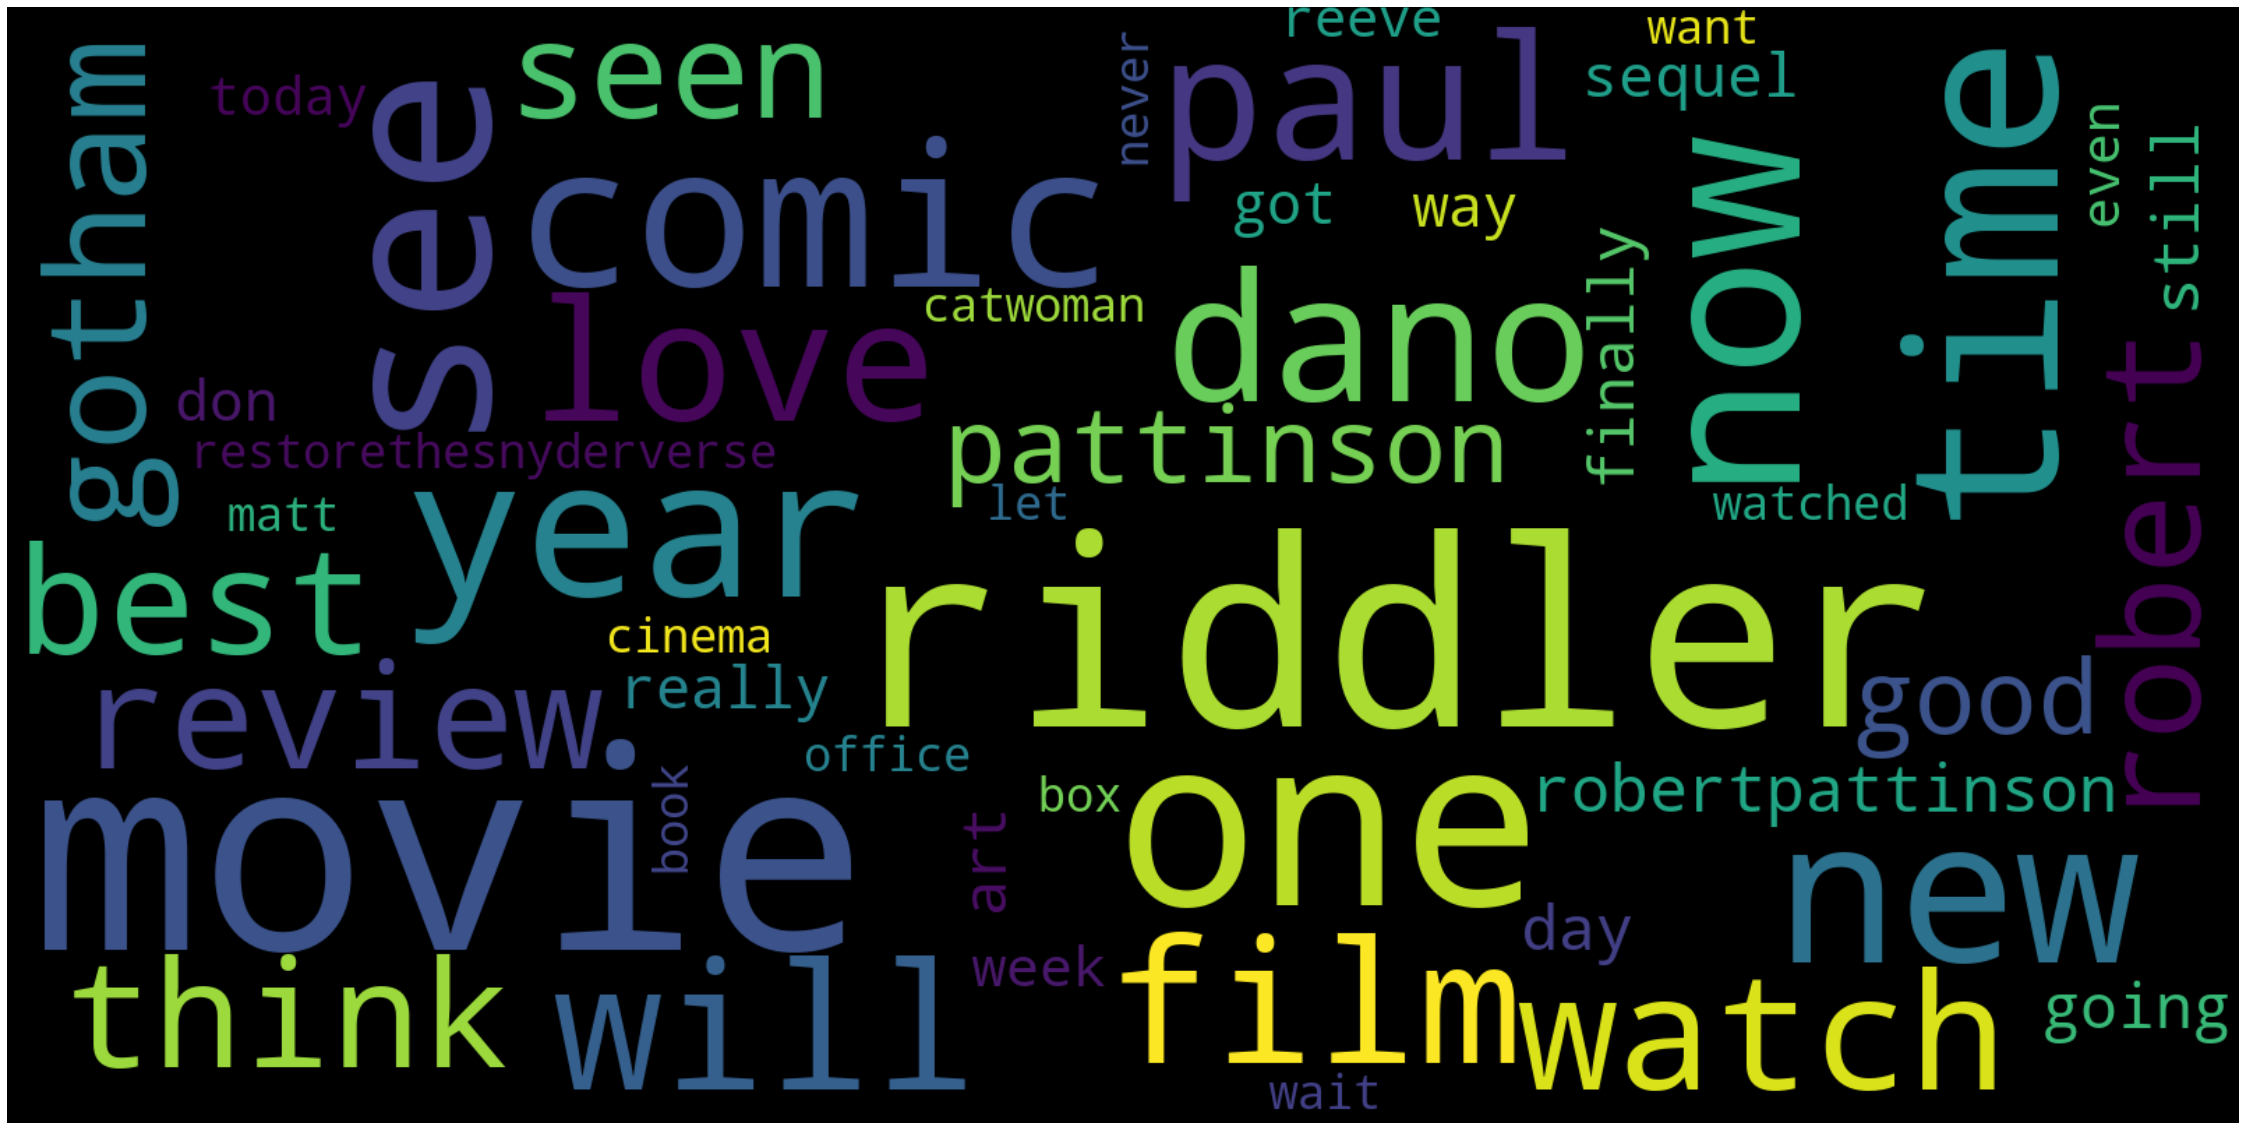

In [103]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(clean_tweets)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() #showing wordcloud

Text(0.5, 1.0, 'Retweets v created_at')

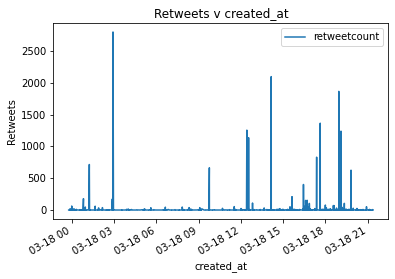

In [155]:
%matplotlib inline
df1.plot.line(x='created_at',y='retweetcount')
plt.ylabel("Retweets")
plt.title('Retweets v created_at')

Text(0.5, 1.0, 'Likes v created_at')

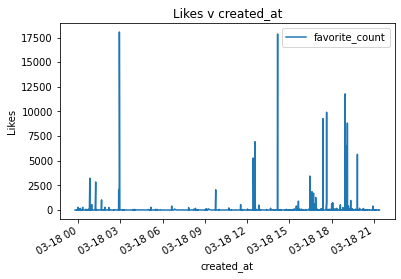

In [158]:
df1.plot.line(x='created_at',y='favorite_count')
plt.ylabel("Likes")
plt.title('Likes v created_at')

In [106]:
from gensim.models.word2vec import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import nltk
nltk.download('stopwords')
df2 = df1.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
stopwords = nltk.corpus.stopwords.words('english')

df2['text'] = df2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [108]:
cleanTweets = df2['text'].apply(cleaning_tweets)

In [ ]:
cleanTweets

In [110]:
def cleanText(corpus):
    corpus = [z.lower().replace('\n','').split() for z in corpus]
    return corpus

x_train = cleanText(cleanTweets)

In [ ]:
x_train

In [112]:
tweet_w2v = Word2Vec(size=100, min_count=5,iter=100)
tweet_w2v.build_vocab(x_train)
tweet_w2v.train(x_train,total_examples=tweet_w2v.corpus_count, epochs=tweet_w2v.epochs)

(844816, 1677500)

In [113]:
len(tweet_w2v.wv.vocab)

610

In [ ]:
tweet_w2v.wv.vocab

In [146]:
tweet_w2v.most_similar('good')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fan', 0.5726903676986694),
 ('news', 0.5189350843429565),
 ('twilight', 0.49080175161361694),
 ('long', 0.4670133888721466),
 ('making', 0.45980632305145264),
 ('damn', 0.4587230682373047),
 ('better', 0.45688092708587646),
 ('guy', 0.455143541097641),
 ('used', 0.4456334114074707),
 ('change', 0.444314181804657)]

In [148]:
tweet_w2v.most_similar('bad')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('brucewayne', 0.6701666116714478),
 ('gothamcity', 0.6441237926483154),
 ('building', 0.5849420428276062),
 ('thedarkknight', 0.5842580199241638),
 ('talking', 0.5816483497619629),
 ('why', 0.5740880966186523),
 ('tell', 0.5620745420455933),
 ('lol', 0.5560673475265503),
 ('nwh', 0.5517112016677856),
 ('feel', 0.5466426014900208)]

In [149]:
tweet_w2v.most_similar('reeves')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fact', 0.6888933181762695),
 ('order', 0.6718240976333618),
 ('director', 0.6685171723365784),
 ('imagine', 0.630994975566864),
 ('prepare', 0.6084401607513428),
 ('role', 0.5727605819702148),
 ('many', 0.554010272026062),
 ('farrell', 0.5354657769203186),
 ('rob', 0.5322436690330505),
 ('colin', 0.517151415348053)]

In [150]:
tweet_w2v.most_similar('pattinson')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('interview', 0.7601914405822754),
 ('actor', 0.6454602479934692),
 ('maybe', 0.6351208090782166),
 ('fest', 0.6286283731460571),
 ('snooze', 0.6254250407218933),
 ('kravitz', 0.6121770739555359),
 ('selina', 0.6013528108596802),
 ('house', 0.5972550511360168),
 ('zoe', 0.5787973403930664),
 ('are', 0.5500311851501465)]

In [151]:
tweet_w2v.most_similar('kravitz')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('zoe', 0.9093247652053833),
 ('selina', 0.8039947748184204),
 ('glad', 0.723042368888855),
 ('robert', 0.7156909704208374),
 ('needs', 0.6834052205085754),
 ('interview', 0.678507924079895),
 ('catwoman', 0.6637797951698303),
 ('order', 0.663286566734314),
 ('batcat', 0.6416835784912109),
 ('some', 0.6405843496322632)]

In [154]:
tweet_w2v.wv.most_similar(positive=['watched'], negative=['good'])

[('yesterday', 0.45547032356262207),
 ('this', 0.4355684518814087),
 ('riddle', 0.4158291518688202),
 ('talk', 0.38519540429115295),
 ('must', 0.3646997809410095),
 ('cause', 0.3538963794708252),
 ('soundtrack', 0.3437148332595825),
 ('streaming', 0.3436865210533142),
 ('listen', 0.34310466051101685),
 ('wait', 0.34243255853652954)]

In [118]:
# visualizing word2vec model
from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


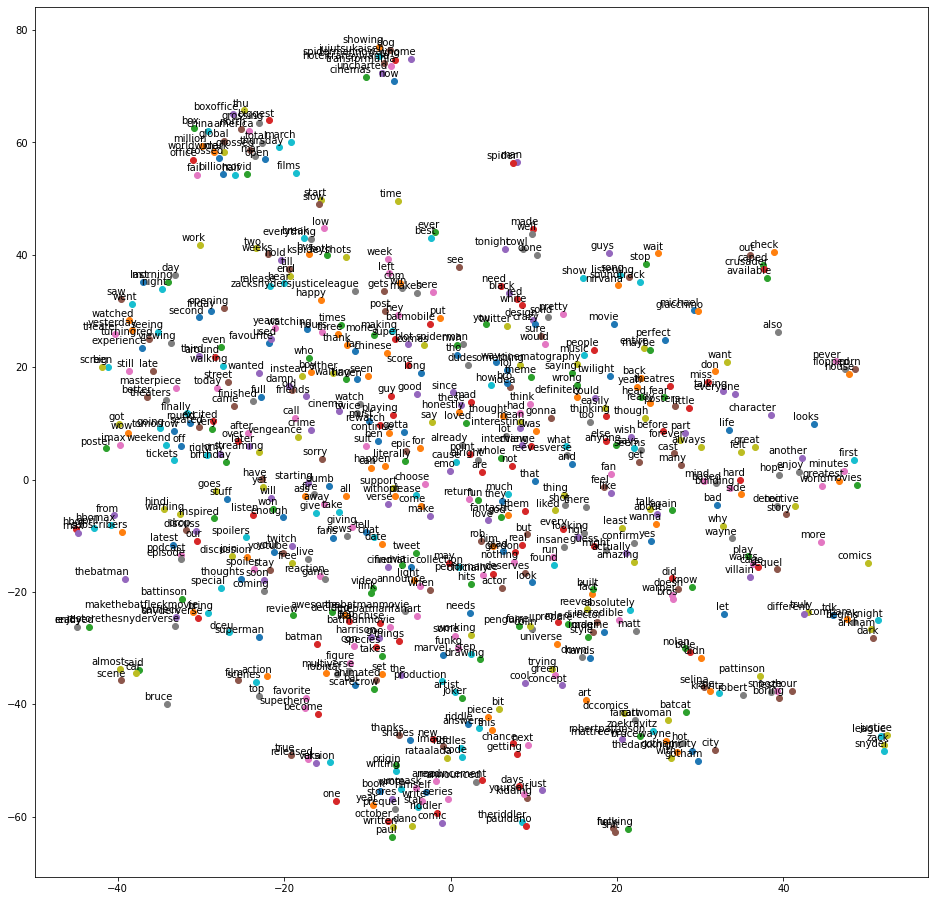

In [119]:
tsne_plot(tweet_w2v)

In [121]:
!pip install datasets transformers[sentencepiece]
from transformers import pipeline
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import torch
import torch.nn.functional as F
import urllib.request
from scipy.special import softmax
import csv
import numpy as np

In [80]:
MODEL = f"finiteautomata/bertweet-base-sentiment-analysis" # Hugging face model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [122]:
batch = tokenizer(list(df1['text']), return_tensors='pt',padding = True, truncation=True)

In [123]:
with torch.no_grad():
  outputs = model(**batch)
  label_ids = torch.argmax(outputs.logits,dim=1)

In [124]:
labels = [model.config.id2label[label_id] for label_id in label_ids.tolist()]

In [125]:
df1['sentiment labels'] = labels
df1

,username,description,location,favorite_count,totaltweets,retweetcount,text,hashtags,created_at,sentiment labels
0,SnyderVerse18,Faith. Alfred. Faith. Used to be a DC movie fa...,,0,3861,0,I haven’t seen not even one #TheBatman post to...,"[TheBatman, RestoreTheSnyderVerse]",2022-03-18 21:23:01,NEU
1,Galaxy__Silver,Seller of beautiful and unique handmade items ...,,1,543,1,"It’s the start of the weekend, so let’s put a ...",[joker],2022-03-18 21:22:54,POS
2,KillerCrocDC,"Images, videos & gifs about DC in all media ✨ ...",Gotham City,0,6,0,"Scarecrow in Batman: The Animated Series, Batm...",[],2022-03-18 21:22:46,NEU
3,JACOBGRAVE,Hyper Detailed Action and Horror comic special...,"Queens, NY",0,306,0,Scarecrow. #scarecrow #batman #art #drawing #t...,"[scarecrow, batman, art, drawing, thebatman, a...",2022-03-18 21:22:45,NEU
4,figdigital,UX | visual designer | animator\nCo-writer & d...,"Austin, TX",0,15022,0,In case you need some #TheBatman design porn i...,[TheBatman],2022-03-18 21:22:43,POS
...,...,...,...,...,...,...,...,...,...,...
1995,yassine_ahal1,‘the shadows on my wall don’t sleep’🥀 infp mf,Madrid,0,7097,0,spoilers de #TheBatman sin contexto https://t....,[TheBatman],2022-03-17 23:48:14,NEU
1996,murfogram,Sales Manager and CAD commercial kitchen plann...,"Tramore, Waterford, Ireland",1,10374,0,The Batman. #TheBatman #overrated https://t.co...,"[TheBatman, overrated]",2022-03-17 23:47:50,NEG
1997,merrph1,I post some drawings I do every now and then. ...,"Massachusetts, USA",0,1118,0,Still thinking about #TheBatman https://t.co/z...,[TheBatman],2022-03-17 23:47:30,NEU
1998,TheHumanDave,,,1,7688,0,I had to do it #funkoPOP #TheBatman https://t....,"[funkoPOP, TheBatman]",2022-03-17 23:47:13,POS


In [126]:
df1.replace('NEU', 'Neutral',inplace=True)
df1.replace('POS', 'Positive',inplace=True)
df1.replace('NEG', 'Negative',inplace=True)

In [127]:
df1

,username,description,location,favorite_count,totaltweets,retweetcount,text,hashtags,created_at,sentiment labels
0,SnyderVerse18,Faith. Alfred. Faith. Used to be a DC movie fa...,,0,3861,0,I haven’t seen not even one #TheBatman post to...,"[TheBatman, RestoreTheSnyderVerse]",2022-03-18 21:23:01,Neutral
1,Galaxy__Silver,Seller of beautiful and unique handmade items ...,,1,543,1,"It’s the start of the weekend, so let’s put a ...",[joker],2022-03-18 21:22:54,Positive
2,KillerCrocDC,"Images, videos & gifs about DC in all media ✨ ...",Gotham City,0,6,0,"Scarecrow in Batman: The Animated Series, Batm...",[],2022-03-18 21:22:46,Neutral
3,JACOBGRAVE,Hyper Detailed Action and Horror comic special...,"Queens, NY",0,306,0,Scarecrow. #scarecrow #batman #art #drawing #t...,"[scarecrow, batman, art, drawing, thebatman, a...",2022-03-18 21:22:45,Neutral
4,figdigital,UX | visual designer | animator\nCo-writer & d...,"Austin, TX",0,15022,0,In case you need some #TheBatman design porn i...,[TheBatman],2022-03-18 21:22:43,Positive
...,...,...,...,...,...,...,...,...,...,...
1995,yassine_ahal1,‘the shadows on my wall don’t sleep’🥀 infp mf,Madrid,0,7097,0,spoilers de #TheBatman sin contexto https://t....,[TheBatman],2022-03-17 23:48:14,Neutral
1996,murfogram,Sales Manager and CAD commercial kitchen plann...,"Tramore, Waterford, Ireland",1,10374,0,The Batman. #TheBatman #overrated https://t.co...,"[TheBatman, overrated]",2022-03-17 23:47:50,Negative
1997,merrph1,I post some drawings I do every now and then. ...,"Massachusetts, USA",0,1118,0,Still thinking about #TheBatman https://t.co/z...,[TheBatman],2022-03-17 23:47:30,Neutral
1998,TheHumanDave,,,1,7688,0,I had to do it #funkoPOP #TheBatman https://t....,"[funkoPOP, TheBatman]",2022-03-17 23:47:13,Positive


Text(0.5, 1.0, 'Sentiment Proportion')

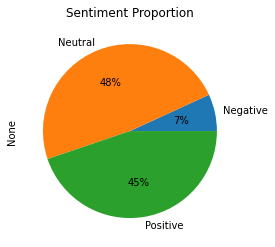

In [143]:
df1.groupby(['sentiment labels']).size().plot.pie(autopct='%1.0f%%')
plt.title('Sentiment Proportion')

Text(0.5, 1.0, 'Retweets v Sentiment')

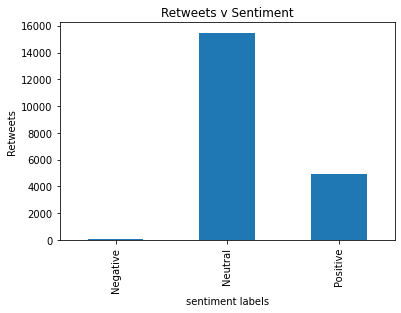

In [144]:
df1.groupby(['sentiment labels'])['retweetcount'].sum().plot(kind ='bar') 
plt.ylabel("Retweets")
plt.title('Retweets v Sentiment')

Text(0.5, 1.0, 'Likes v Sentiment')

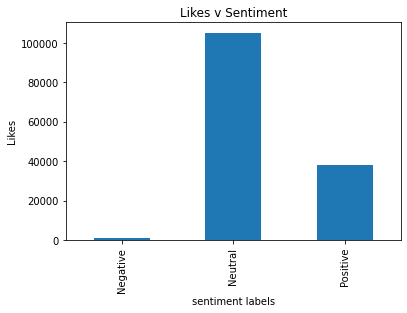

In [145]:
df1.groupby(['sentiment labels'])['favorite_count'].sum().plot(kind ='bar') 
plt.ylabel("Likes")
plt.title('Likes v Sentiment')

In [131]:
df1[df1.favorite_count == df1.favorite_count.max()] # finding tweet with most likes

,username,description,location,favorite_count,totaltweets,retweetcount,text,hashtags,created_at,sentiment labels
1754,maik_check,drawing for food! ✊😔 he/him\nemail me @ mykber...,,18068,9469,2797,some bat peeps #TheBatman https://t.co/5wuRSadkyf,[TheBatman],2022-03-18 02:55:54,Neutral


In [132]:
df1[df1.retweetcount == df1.retweetcount.max()] # finding tweet with most retweets

,username,description,location,favorite_count,totaltweets,retweetcount,text,hashtags,created_at,sentiment labels
1754,maik_check,drawing for food! ✊😔 he/him\nemail me @ mykber...,,18068,9469,2797,some bat peeps #TheBatman https://t.co/5wuRSadkyf,[TheBatman],2022-03-18 02:55:54,Neutral


In [133]:
# visualizing most used hashtags
hashtag_list = df1.hashtags.to_list()

In [134]:
hashtags = [x for l in hashtag_list for x in l]
hashtags = (" ").join(hashtags)

In [135]:
hashtags

'TheBatman RestoreTheSnyderVerse joker scarecrow batman art drawing thebatman arkhamknight TheBatman TheBatman Batman TheBatman Batman TheBatman TheBatman TheBatman TheBatman TheBatman funko FunkoPop Batman TheBatmanMovie TheBatman TheBatman TheBatman TheBatman DILTRiddles theBatman TheBatman TheBatman TheBatman TheBatman TheBatman theriddler McfarlaneToys TheBatman thebatman TheBatman TheBatman TheBatman TheBatman TheBatman TheBatman TheRiddler thebatman TheBatman TheBatmanMovie TheBatman Batman TheBatman TheBatman TheBatman TheBatman TheBatman TheBatman TheBatman TheBatman thebatmanmovie batman nftcommunity TheBatman TheBatman TheBatman RestoreTheSnyderVerse MakeTheBatfleckMovie ReleaseTheAyerCut TheBatman Batman sexy thirsting TheBatman TheBatman TheBatman TheBatman TheBatman TheBatman TheBatman RobertPattinson TimotheeChalamet TheBatman Batman Robin TheBatman TheBatman TheBatman TheBatman TheBatman beijing2022 thebatman TheBatman TheBatman pauldano DCFanDome thebatman MattReeves ro

In [141]:
stopwords = set(STOPWORDS)
stopwords.update(["thebatman","TheBatman"]) #adding our own stopwords

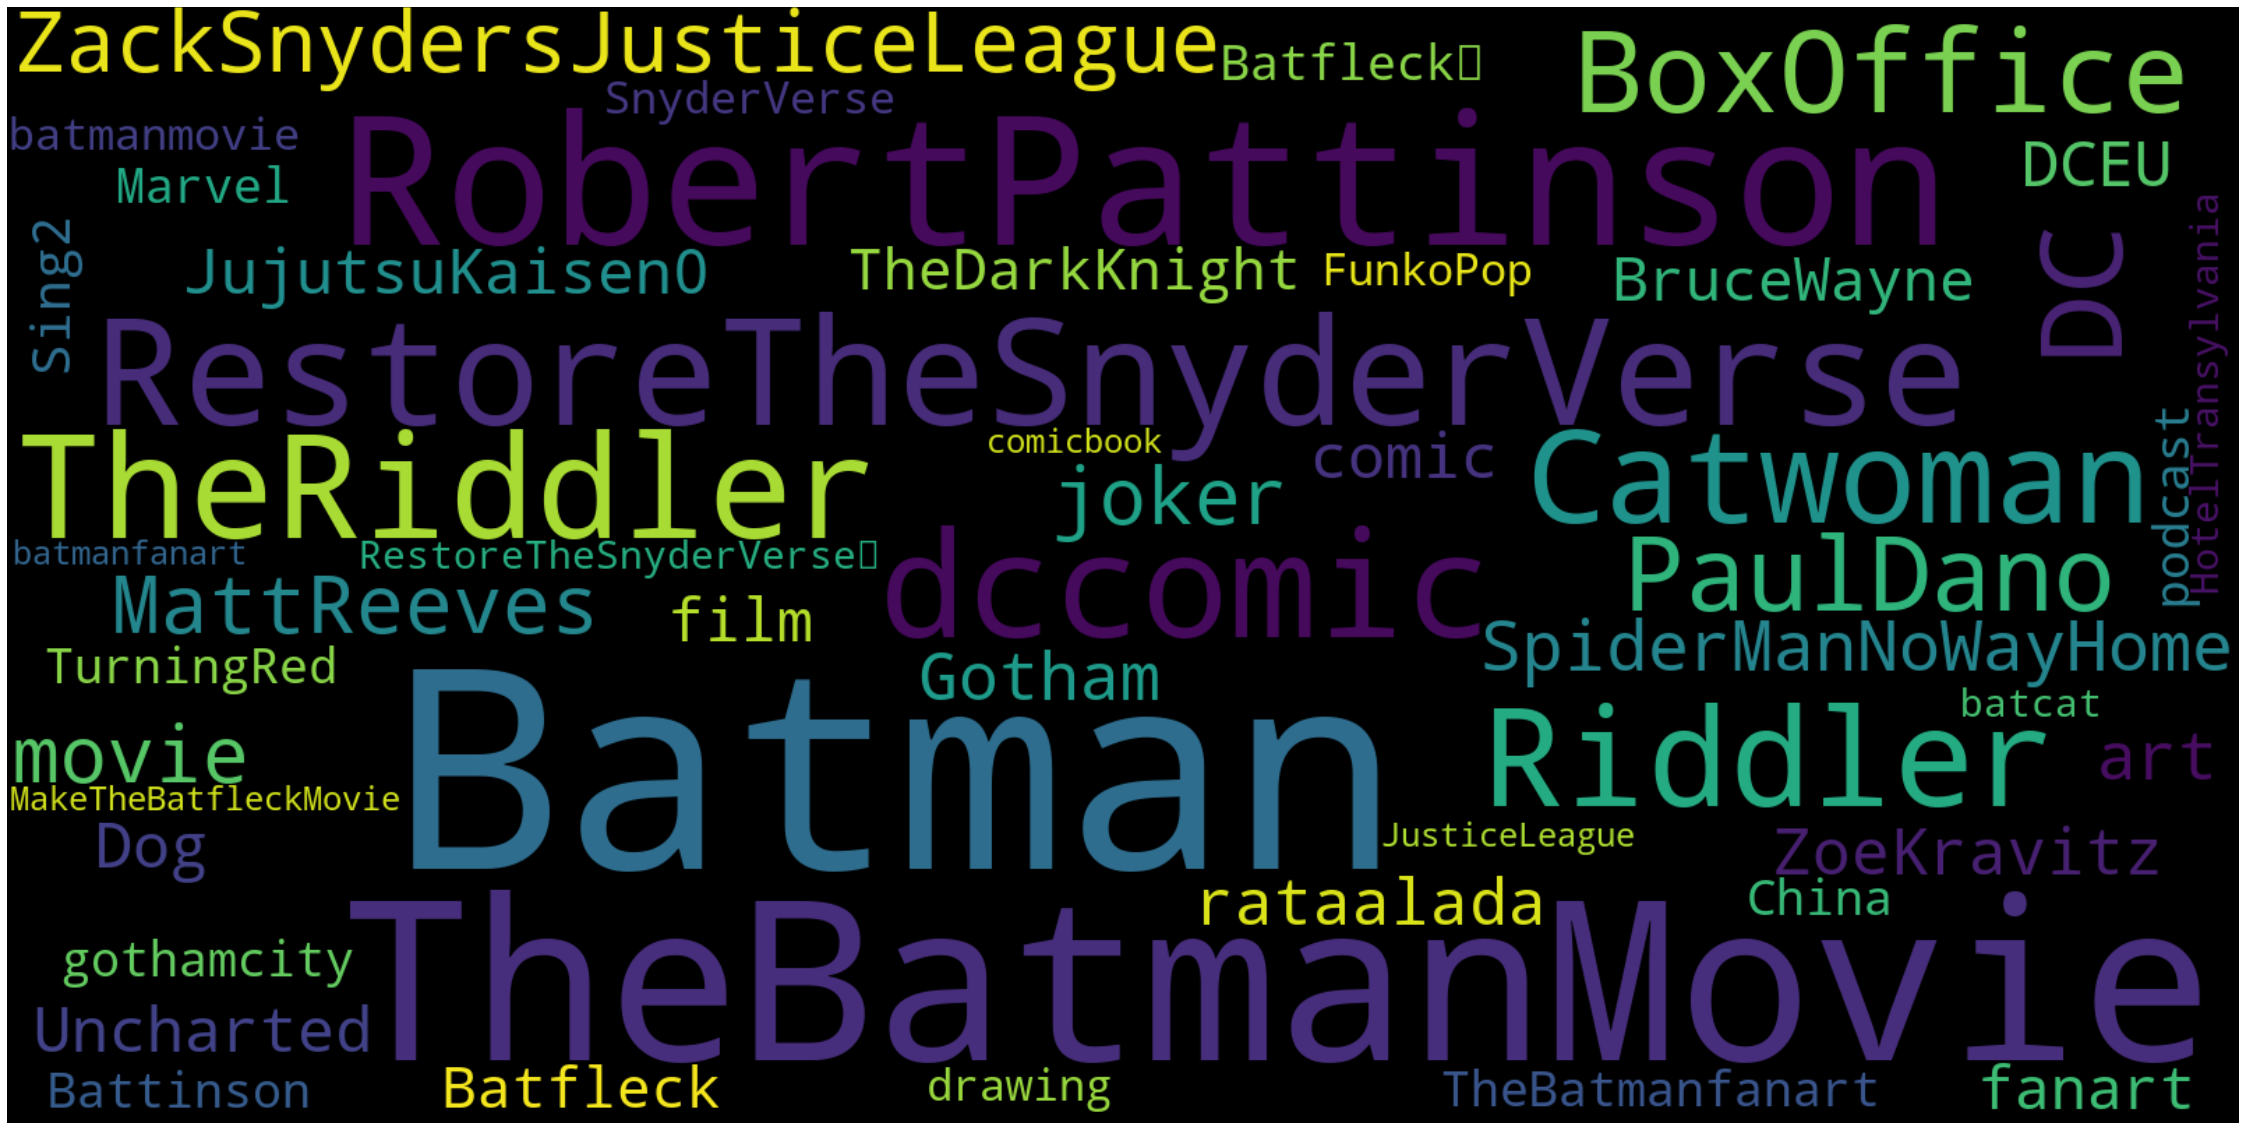

In [142]:
wordcloud = WordCloud(width=1600,height=800,stopwords=stopwords,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(hashtags)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 